In [1]:
import numpy as np 
import pandas as pd

In [2]:
data_path = 'CHESS_DATA.csv'
data = pd.read_csv(data_path)
data = data[:30000]

In [4]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
x_columns = list()
for i in range(1, 9):
    for j in range(1, 9):
        x_columns.append(f'{alphabet[j-1]}{i}')

In [5]:
from sklearn.preprocessing import LabelEncoder
input_encoder = LabelEncoder()
output_encoder = LabelEncoder()

In [6]:
for col in x_columns:
    data[col] = output_encoder.fit_transform(data[col])
X = data[x_columns]

In [7]:
X

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8
0,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
1,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
2,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
3,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
4,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,9,0,6,0,7,0,0,0,9,10,...,0,2,5,0,4,0,0,5,0,0
29996,9,0,6,0,7,0,0,0,9,10,...,0,2,5,0,0,4,0,5,0,0
29997,9,0,6,0,7,0,0,0,9,10,...,0,2,5,0,0,4,0,5,0,0
29998,9,0,6,0,7,0,0,0,9,10,...,0,0,5,0,0,4,0,5,2,0


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      30000 non-null  int32
 1   B1      30000 non-null  int32
 2   C1      30000 non-null  int32
 3   D1      30000 non-null  int32
 4   E1      30000 non-null  int32
 5   F1      30000 non-null  int32
 6   G1      30000 non-null  int32
 7   H1      30000 non-null  int32
 8   A2      30000 non-null  int32
 9   B2      30000 non-null  int32
 10  C2      30000 non-null  int32
 11  D2      30000 non-null  int32
 12  E2      30000 non-null  int32
 13  F2      30000 non-null  int32
 14  G2      30000 non-null  int32
 15  H2      30000 non-null  int32
 16  A3      30000 non-null  int32
 17  B3      30000 non-null  int32
 18  C3      30000 non-null  int32
 19  D3      30000 non-null  int32
 20  E3      30000 non-null  int32
 21  F3      30000 non-null  int32
 22  G3      30000 non-null  int32
 23  H3      300

In [9]:
y = np.array(data['MOVE_FROM'])
y = output_encoder.fit_transform(y)


In [66]:
y

array([25, 30, 17, ..., 62, 44, 31])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=1)

In [11]:
INPUT = X_valid.shape[1]
OUTPUT = 64

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization 
model = Sequential()
model.add(Dense(INPUT, input_shape=(INPUT,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(OUTPUT, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [14]:
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_valid,y_valid))

Epoch 1/100
750/750 [==============================] - 11s 8ms/step - loss: 4.2754 - accuracy: 0.0303 - val_loss: 4.2325 - val_accuracy: 0.0385
Epoch 2/100
750/750 [==============================] - 5s 7ms/step - loss: 4.0432 - accuracy: 0.0438 - val_loss: 4.0539 - val_accuracy: 0.0455
Epoch 3/100
750/750 [==============================] - 5s 7ms/step - loss: 3.9874 - accuracy: 0.0499 - val_loss: 4.0282 - val_accuracy: 0.0498
Epoch 4/100
750/750 [==============================] - 5s 7ms/step - loss: 3.9439 - accuracy: 0.0558 - val_loss: 4.0227 - val_accuracy: 0.0513
Epoch 5/100
750/750 [==============================] - 5s 7ms/step - loss: 3.9007 - accuracy: 0.0653 - val_loss: 3.9930 - val_accuracy: 0.0633
Epoch 6/100
750/750 [==============================] - 5s 7ms/step - loss: 3.8679 - accuracy: 0.0702 - val_loss: 3.9580 - val_accuracy: 0.0635
Epoch 7/100
750/750 [==============================] - 5s 7ms/step - loss: 3.8233 - accuracy: 0.0784 - val_loss: 3.9791 - val_accuracy: 0.063

Epoch 58/100
750/750 [==============================] - 5s 7ms/step - loss: 2.3565 - accuracy: 0.3340 - val_loss: 4.9641 - val_accuracy: 0.0595
Epoch 59/100
750/750 [==============================] - 5s 7ms/step - loss: 2.3395 - accuracy: 0.3379 - val_loss: 4.9749 - val_accuracy: 0.0568
Epoch 60/100
750/750 [==============================] - 5s 7ms/step - loss: 2.3393 - accuracy: 0.3392 - val_loss: 5.0552 - val_accuracy: 0.0590
Epoch 61/100
750/750 [==============================] - 5s 7ms/step - loss: 2.3152 - accuracy: 0.3449 - val_loss: 5.0309 - val_accuracy: 0.0598
Epoch 62/100
750/750 [==============================] - 5s 7ms/step - loss: 2.2922 - accuracy: 0.3519 - val_loss: 5.0675 - val_accuracy: 0.0572
Epoch 63/100
750/750 [==============================] - 5s 7ms/step - loss: 2.2923 - accuracy: 0.3458 - val_loss: 5.1186 - val_accuracy: 0.0555
Epoch 64/100
750/750 [==============================] - 5s 7ms/step - loss: 2.2568 - accuracy: 0.3577 - val_loss: 5.0948 - val_accuracy:

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1

In [15]:
import matplotlib.pylab as plt

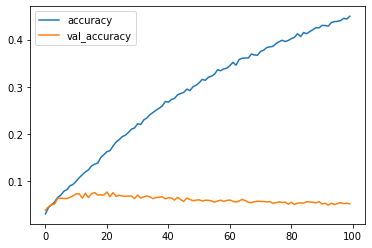

In [16]:
plt.plot(history.epoch,history.history.get('accuracy'),label='accuracy')
plt.plot(history.epoch,history.history.get('val_accuracy'),label='val_accuracy')
plt.legend()

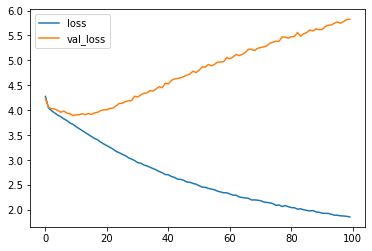

In [17]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()